In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [4]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

### 실전 데이타 응용하기
     countplot()  - 각 카테고리별 데이타가 얼마나 있는지 표시할 수 있다.
     barplot() - 막대의 높이로 기본적인 바 차트를 표시할 수 있다.
     boxplot()  - 4분위값 표시하기
     heatmap() - 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.


In [5]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

<AxesSubplot:xlabel='class', ylabel='count'>

Text(0.5, 1.0, '타이타닉호의 각 클래스별 승객수')

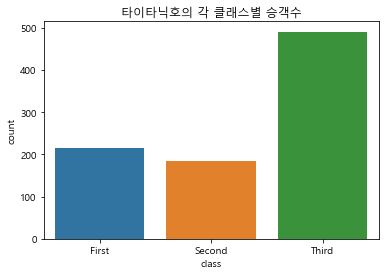

In [6]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 각 클래스별 승객수')
plt.show()

<AxesSubplot:xlabel='day', ylabel='count'>

Text(0.5, 1.0, '요일별 팁을 준 횟수')

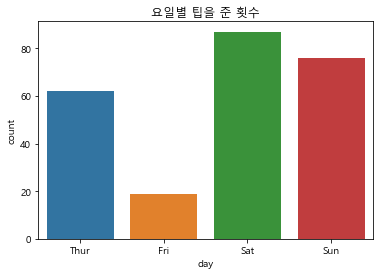

In [7]:
sns.countplot(x='day', data=tips)
plt.title('요일별 팁을 준 횟수')
plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

Text(0.5, 1.0, '요일별 총지불액')

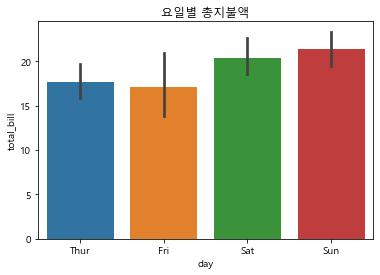

In [8]:
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('요일별 총지불액')
plt.show()

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

Text(0.5, 1.0, '연도, 월별 승객수에 대한 HeatMap')

<AxesSubplot:title={'center':'연도, 월별 승객수에 대한 HeatMap'}, xlabel='year', ylabel='month'>

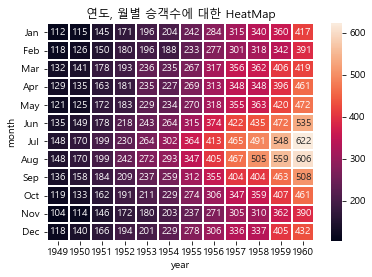

In [9]:
flights = flights.pivot('month', 'year', 'passengers')
flights
plt.title('연도, 월별 승객수에 대한 HeatMap')
sns.heatmap(flights, annot=True, fmt='d', linewidths=1)
plt.show()

In [10]:
# 자주 등장하는 단어 시각화하는 라이브러리
!pip install wordcloud

<Figure size 432x288 with 0 Axes>

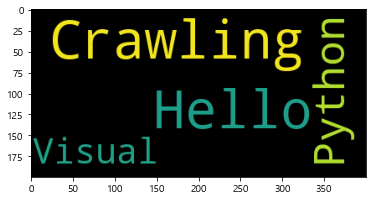

In [11]:
# 1. wordcloud 생성
import wordcloud

keywords = {'Hello': 5, 'Python': 3, 'Crawling': 5, 'Visual': 2}
wc = wordcloud.WordCloud() # wordcloud 객체 생성
cloud = wc.generate_from_frequencies(keywords) # 빈도에 맞게 wordcloud 만들어주는 함수

plt.figure()
plt.imshow(cloud)
plt.show()

<Figure size 432x288 with 0 Axes>

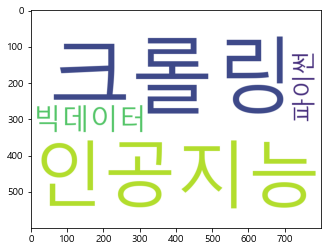

<Figure size 432x288 with 0 Axes>

In [12]:
# 한글 데이터...폰트 지원 안 돼서 깨짐
keywords = {'파이썬': 2, '크롤링': 6, '빅데이터': 3, '인공지능': 5}
wc = wordcloud.WordCloud(font_path="C:\Windows\Fonts\malgun.ttf", # 폰트 경로 잡아줌
                        background_color='white', width=800, height=600) 
cloud = wc.generate_from_frequencies(keywords)

plt.figure()
plt.imshow(cloud)
plt.show()
plt.savefig('wordCloud.png')